# Sentiment Analysis using BERT - Keras

In [2]:
import os
import math
import datetime

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix, classification_report

In [37]:
import config 
import DataLoader as dl
import ModelGenerator as mg
import Train
from ModelValidation import plot_history

In [4]:
np.random.seed(config.RANDOM_SEED)
tf.random.set_seed(config.RANDOM_SEED)

In [5]:
raw_data = dl.DataFetcher("../input/IMDB Dataset.csv")

In [6]:
preprocessed_data = dl.DataGenerator(raw_data.train, raw_data.test, config.tokenizer, raw_data.classes, max_seq_len=128)

49900it [02:58, 279.35it/s]
100it [00:00, 285.66it/s]


max seq_len 3157


In [7]:
model = mg.create_model(preprocessed_data.max_seq_len, config.bert_ckpt_file, raw_data.classes)

bert shape (None, 128, 128)
Done loading 68 BERT weights from: ../model/uncased_L-12_H-768_A-12\bert_model.ckpt into <bert.model.BertModelLayer object at 0x000001CE38924F98> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 128)]             0         
_________________________________________________________________
bert (BertModelLayer)        (None, 128, 128)   

In [8]:
history = Train.Trainer(model, preprocessed_data).history

Train on 44910 samples, validate on 4990 samples
Epoch 1/5
44910/44910 [==============================] - 115s 3ms/sample - loss: 0.6930 - acc: 0.5546 - val_loss: 0.6344 - val_acc: 0.6517
Epoch 2/5
44910/44910 [==============================] - 105s 2ms/sample - loss: 0.6235 - acc: 0.6579 - val_loss: 0.6048 - val_acc: 0.6868
Epoch 3/5
44910/44910 [==============================] - 110s 2ms/sample - loss: 0.5575 - acc: 0.7385 - val_loss: 0.6022 - val_acc: 0.6928
Epoch 4/5
44910/44910 [==============================] - 108s 2ms/sample - loss: 0.5322 - acc: 0.7674 - val_loss: 0.5988 - val_acc: 0.6942
Epoch 5/5
44910/44910 [==============================] - 108s 2ms/sample - loss: 0.5177 - acc: 0.7829 - val_loss: 0.5918 - val_acc: 0.7080


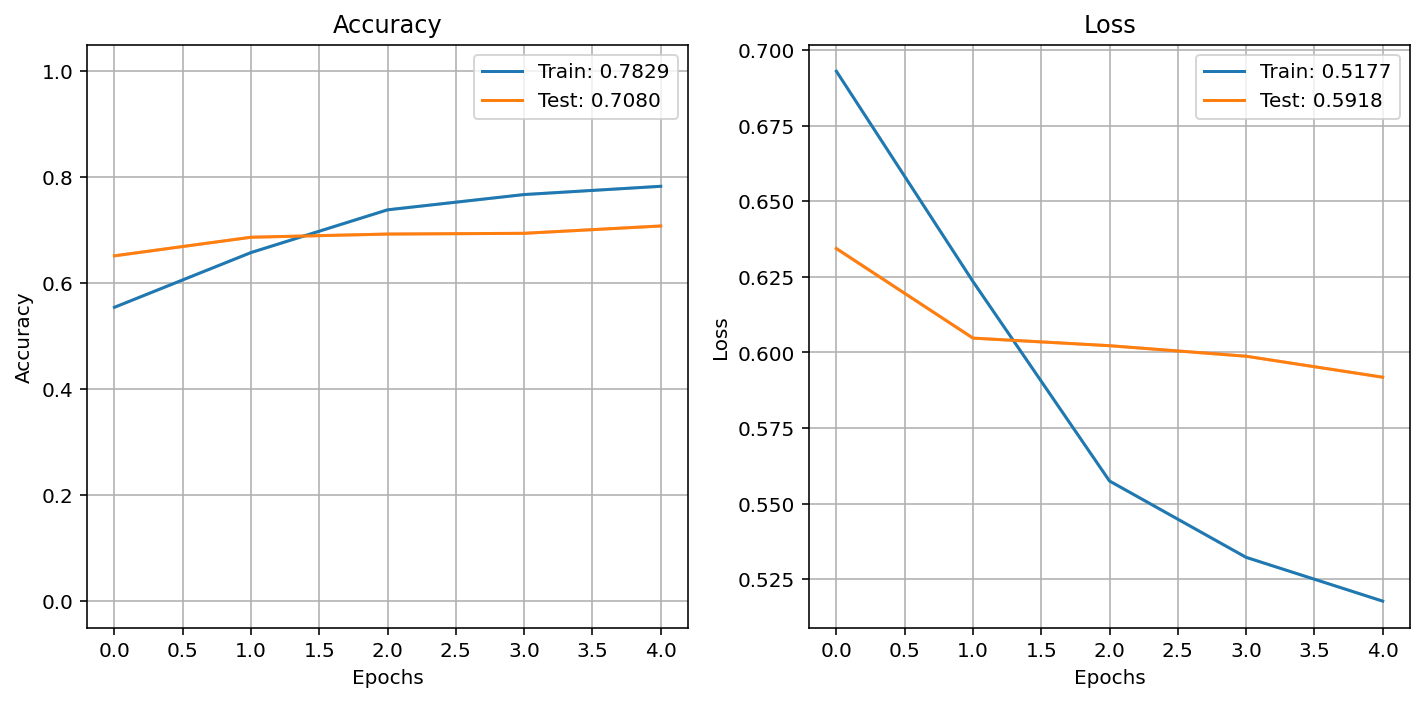

In [36]:
plot_history(history.history)